In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
churn_data = pd.read_csv('Customer_Churn.csv')

In [3]:
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
churn_Data3 = pd.read_csv('Customer_Churn.csv')

In [5]:
churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### DATA PREPROCESSING

In [6]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
churn_data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

### One Hot Encoding

In [6]:
churn_data['Churn'] = churn_data['Churn'].map({'Yes':1,'No':0})


In [11]:
churn_data = pd.get_dummies(churn_data, drop_first=True)

In [6]:
churn_data2 = churn_data

In [7]:
columns_to_encode = ['Partner', 'StreamingMovies', 'Dependents','PhoneService','DeviceProtection','TechSupport','StreamingTV','PaperlessBilling']  # replace with your actual columns
churn_data[columns_to_encode] = churn_data[columns_to_encode].applymap(lambda x: 1 if x == 'Yes' else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_8116\2635899361.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  churn_data[columns_to_encode] = churn_data[columns_to_encode].applymap(lambda x: 1 if x == 'Yes' else 0)


### Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
churn_data['InternetService'] = encoder.fit_transform(churn_data['InternetService'])  
print(encoder.classes_)  


['DSL' 'Fiber optic' 'No']


In [9]:
encoder = LabelEncoder()
churn_data['gender'] = encoder.fit_transform(churn_data['gender'])  
print(encoder.classes_)  


['Female' 'Male']


In [10]:
encoder = LabelEncoder()
churn_data['OnlineBackup'] = encoder.fit_transform(churn_data['OnlineBackup'])  
print(encoder.classes_)  


['No' 'No internet service' 'Yes']


In [11]:
encoder = LabelEncoder()
churn_data['OnlineSecurity'] = encoder.fit_transform(churn_data['OnlineSecurity'])  
print(encoder.classes_)  


['No' 'No internet service' 'Yes']


In [12]:
encoder = LabelEncoder()
churn_data['PaymentMethod'] = encoder.fit_transform(churn_data['PaymentMethod'])  
print(encoder.classes_)  


['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


In [13]:
encoder = LabelEncoder()
churn_data['MultipleLines'] = encoder.fit_transform(churn_data['MultipleLines'])  
print(encoder.classes_)  


['No' 'No phone service' 'Yes']


In [14]:
encoder = LabelEncoder()
churn_data['Contract'] = encoder.fit_transform(churn_data['Contract'])  
print(encoder.classes_)  


['Month-to-month' 'One year' 'Two year']


In [15]:
churn_data.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int32
PaperlessBilling      int64
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [16]:
churn_data = churn_data.drop('customerID', axis=1)

### FINDING CORRELATION

In [28]:
churn_data.columns = churn_data.columns.str.strip()

In [29]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,1,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [38]:
for col in churn_data.columns:
    if churn_data[col].dtype == object:
        # check if can be converted to numeric
        try:
            pd.to_numeric(churn_data[col])
        except ValueError as e:
            print(f"{col} cannot be fully converted:\n{e}\n")


OnlineSecurity cannot be fully converted:
Unable to parse string "No" at position 0

OnlineBackup cannot be fully converted:
Unable to parse string "Yes" at position 0

TotalCharges cannot be fully converted:
Unable to parse string " " at position 488



In [17]:
churn_data['TotalCharges'] = (churn_data['TotalCharges']
    .replace(r'^\s*$', '0', regex=True)  # replacing empty/whitespace strings
    .astype(float))                       # converting to float

In [35]:
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [31]:
correlations = churn_data.corr()['Churn'].drop('Churn') #corr amongst the data points dependent variable depends on
most_correlated = correlations.abs().sort_values(ascending=False)
print("Most correlated variables with Churn:\n", most_correlated)

Most correlated variables with Churn:
 Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TotalCharges        0.198324
OnlineBackup        0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
TechSupport         0.164674
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
DeviceProtection    0.066160
StreamingTV         0.063228
StreamingMovies     0.061382
InternetService     0.047291
MultipleLines       0.038037
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64


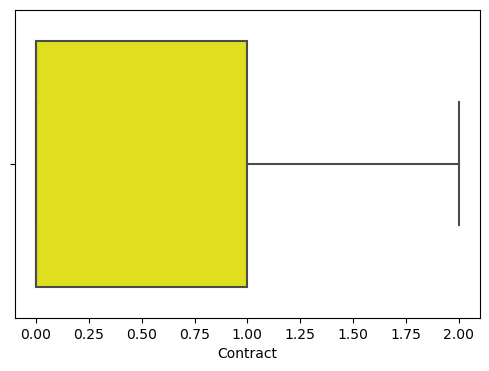

In [37]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=churn_data['Contract'],color='yellow')
plt.show()

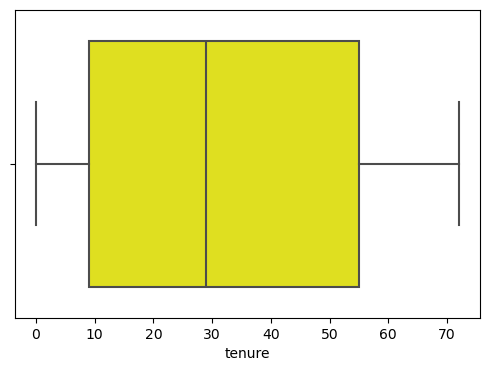

In [43]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=churn_data['tenure'],color='yellow')
plt.show()

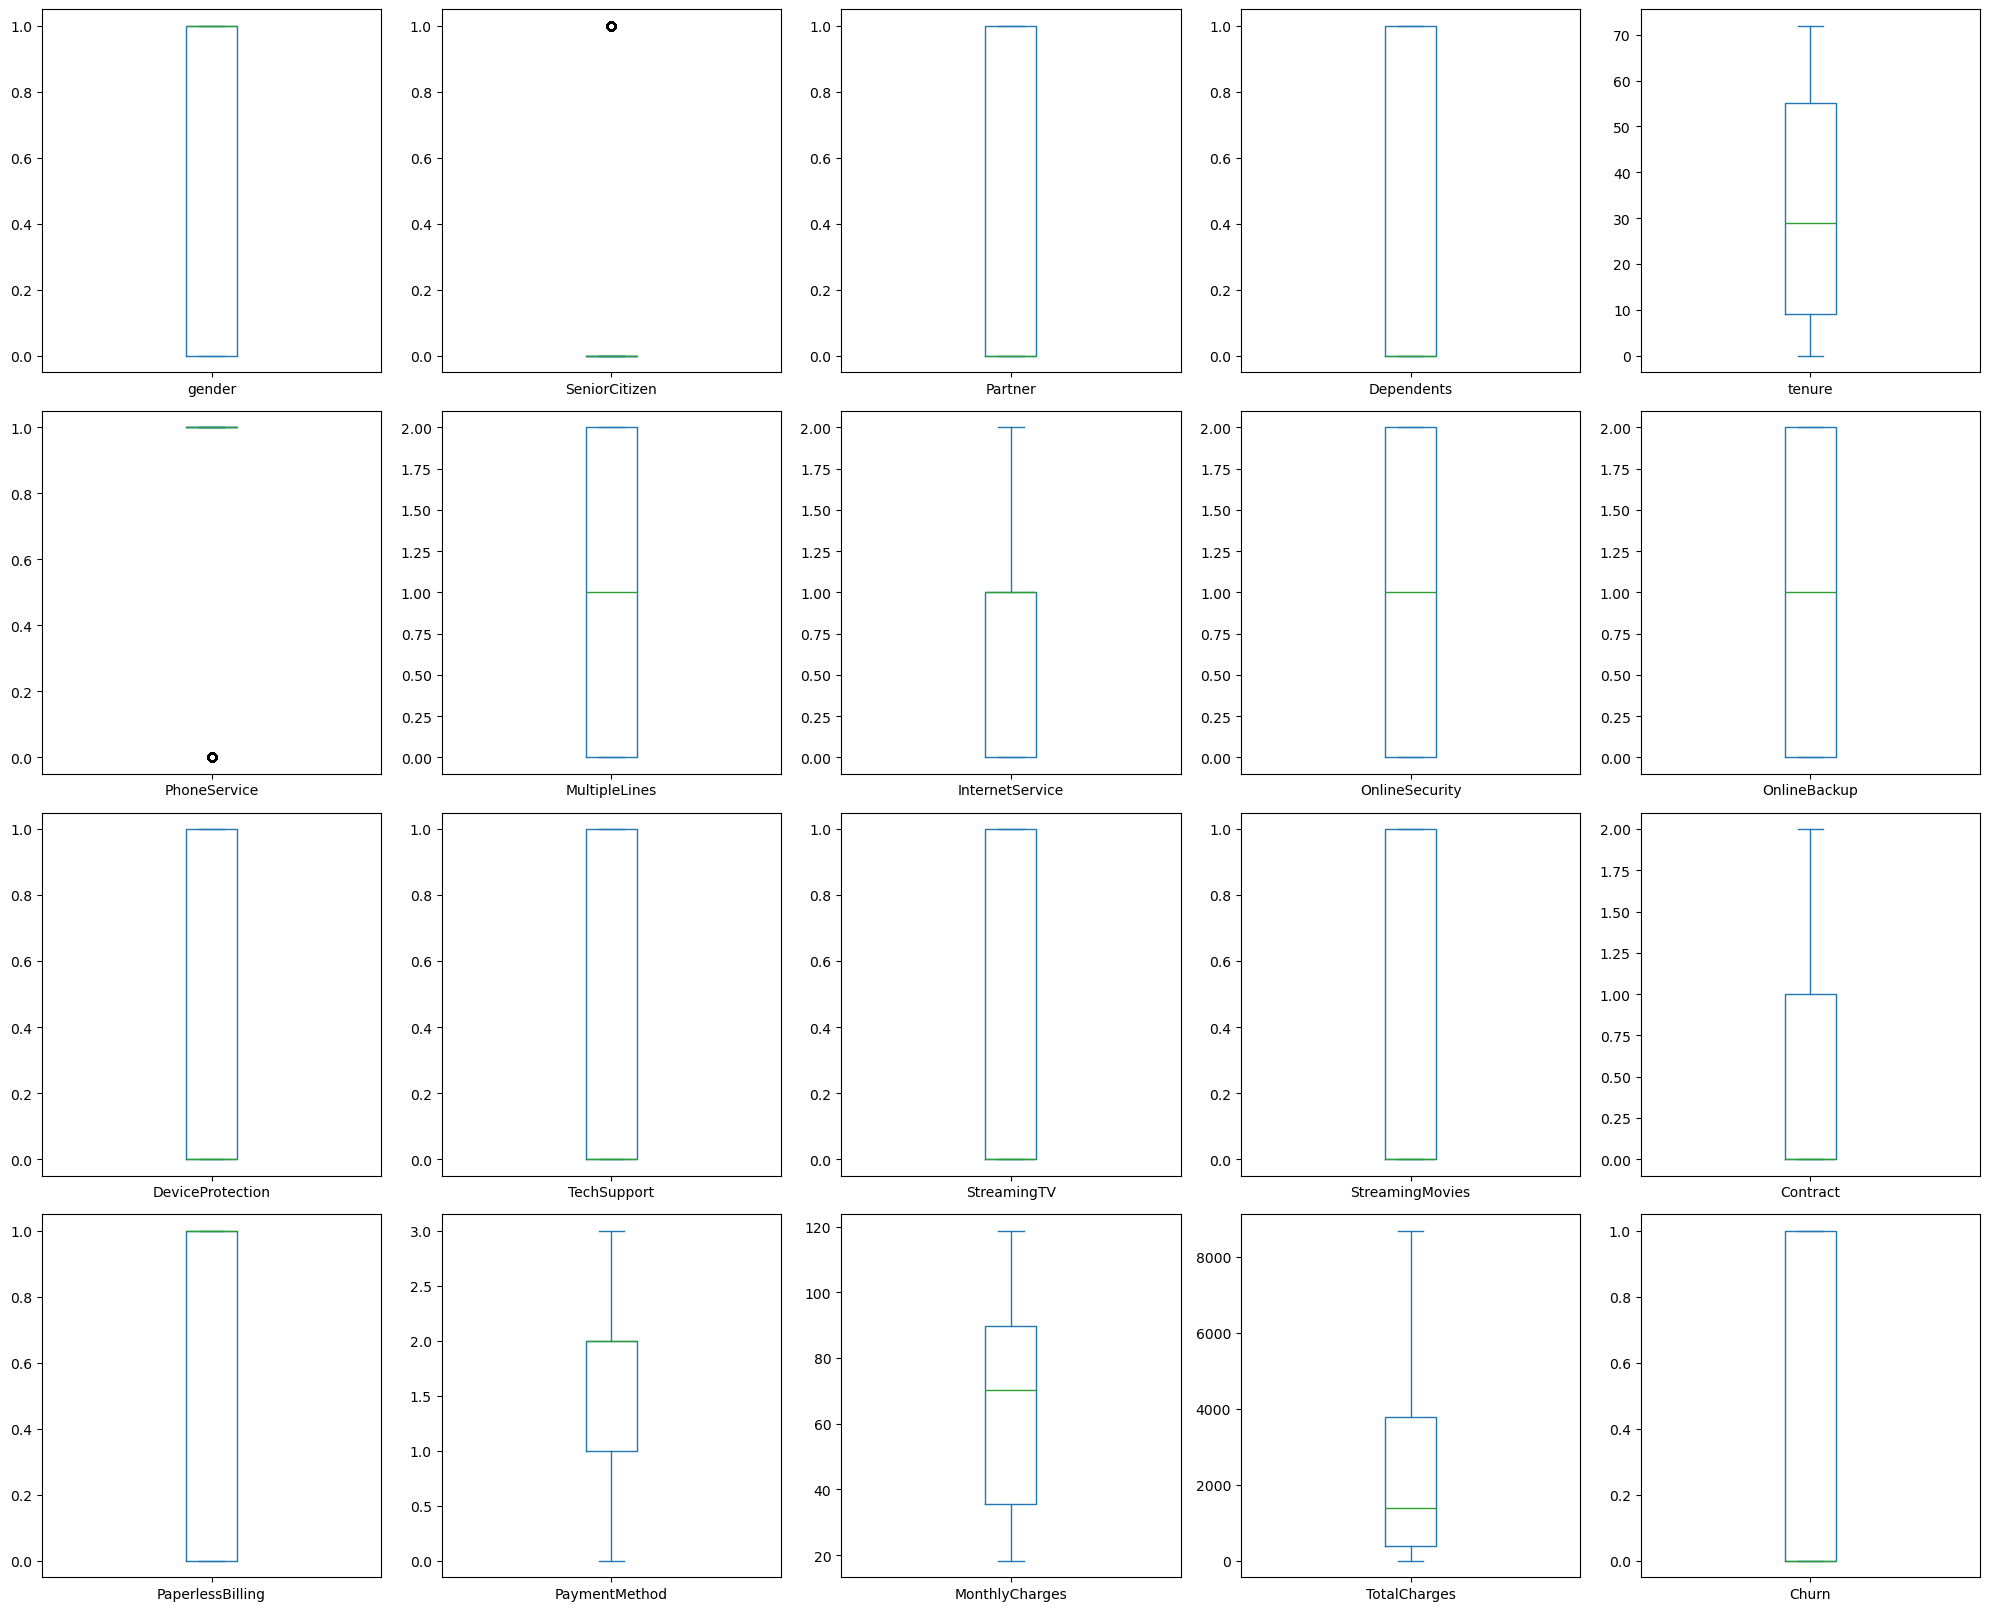

In [40]:
churn_data.plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 20))
plt.tight_layout()
plt.show()

<Axes: xlabel='SeniorCitizen', ylabel='count'>

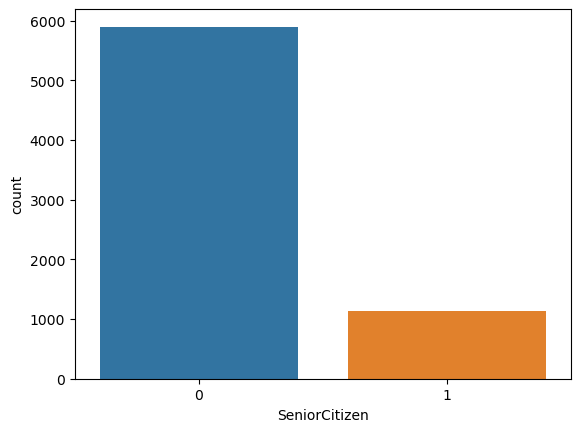

In [44]:
sns.countplot(x='SeniorCitizen', data=churn_data)

<Axes: xlabel='PhoneService', ylabel='count'>

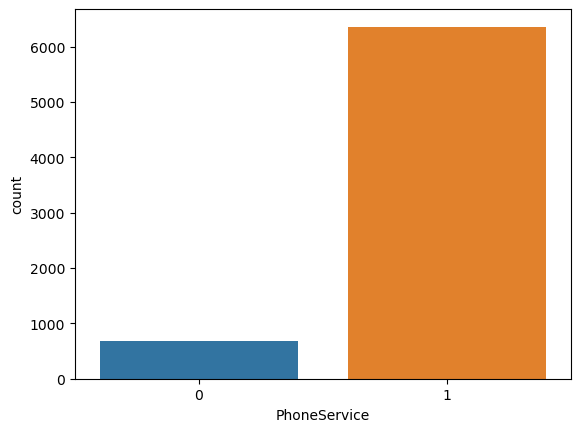

In [45]:
sns.countplot(x='PhoneService', data=churn_data)

### EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

In [46]:
sns.set(style="darkgrid")

In [47]:
churn_data['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


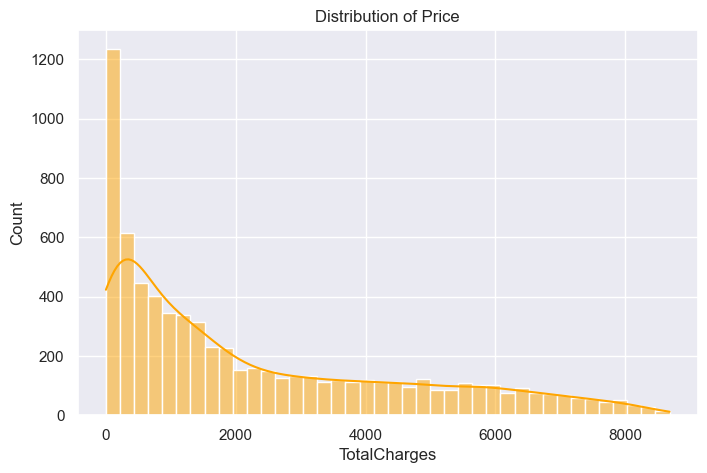

In [48]:
plt.figure(figsize=(8, 5))
sns.histplot(churn_data['TotalCharges'], kde=True, bins=40,color='orange')
plt.title('Distribution of Price')
plt.show()

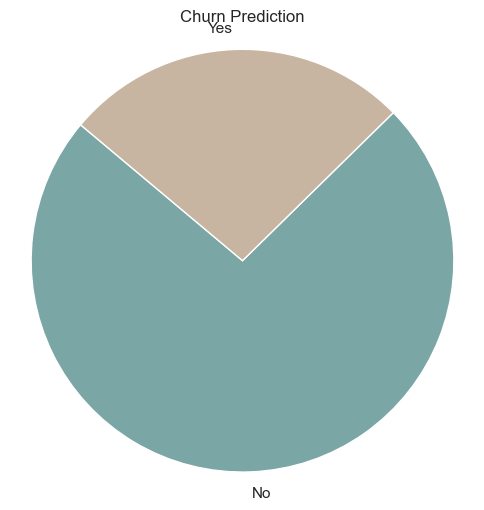

In [52]:
species_counts = churn_Data3['Churn'].value_counts()

# Labels and sizes
labels = species_counts.index
sizes = species_counts.values
colors = ['#7AA6A6','#C8B5A1'] 

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors,startangle=140)
plt.title("Churn Prediction")
plt.axis('equal')
plt.show()

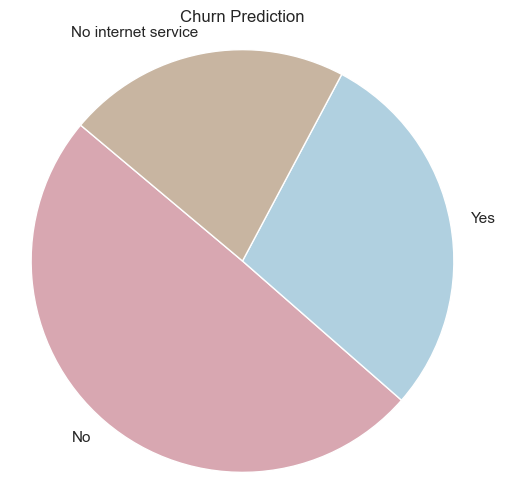

In [54]:
species_counts = churn_Data3['OnlineSecurity'].value_counts()

# Labels and sizes
labels = species_counts.index
sizes = species_counts.values
colors = ['#D8A7B1','#B0D0E0','#C8B5A1'] 

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors,startangle=140)
plt.title("Churn Prediction")
plt.axis('equal')
plt.show()

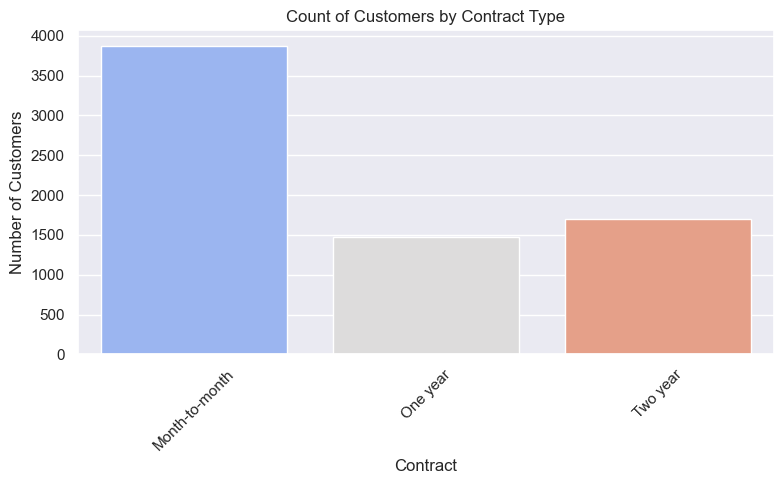

In [56]:
# Bar chart for contract types
plt.figure(figsize=(8, 5))
sns.countplot(data=churn_Data3, x='Contract', palette='coolwarm')
plt.title('Count of Customers by Contract Type')
plt.ylabel('Number of Customers')
plt.xlabel('Contract')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

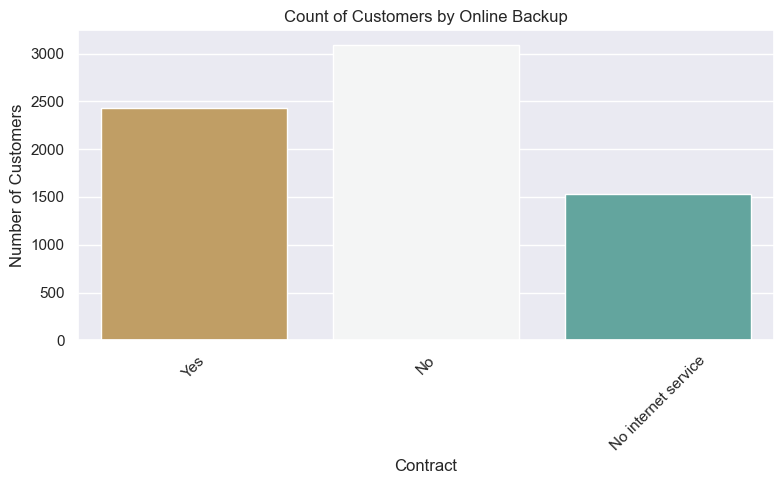

In [63]:
# Bar chart for contract types
plt.figure(figsize=(8, 5))
sns.countplot(data=churn_Data3, x='OnlineBackup', palette='BrBG')
plt.title('Count of Customers by Online Backup')
plt.ylabel('Number of Customers')
plt.xlabel('Contract')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
churn_Data3['TotalCharges'] = (churn_data['TotalCharges']
    .replace(r'^\s*$', '0', regex=True) 
    .astype(float))                      

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


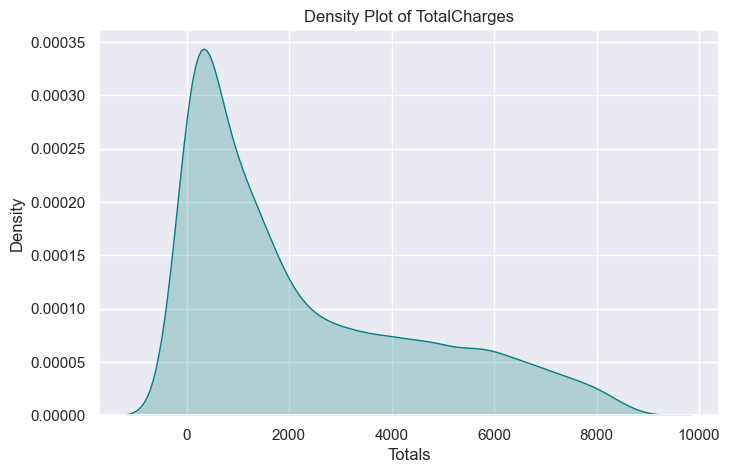

In [92]:
plt.figure(figsize=(8, 5))
sns.kdeplot(churn_Data3['TotalCharges'], fill=True, color='teal')
plt.title('Density Plot of TotalCharges')
plt.xlabel('Totals')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### BIVARIATE ANALYSIS

In [96]:
crosstab = pd.crosstab(churn_Data3['InternetService'], churn_Data3['Churn'], normalize='index')

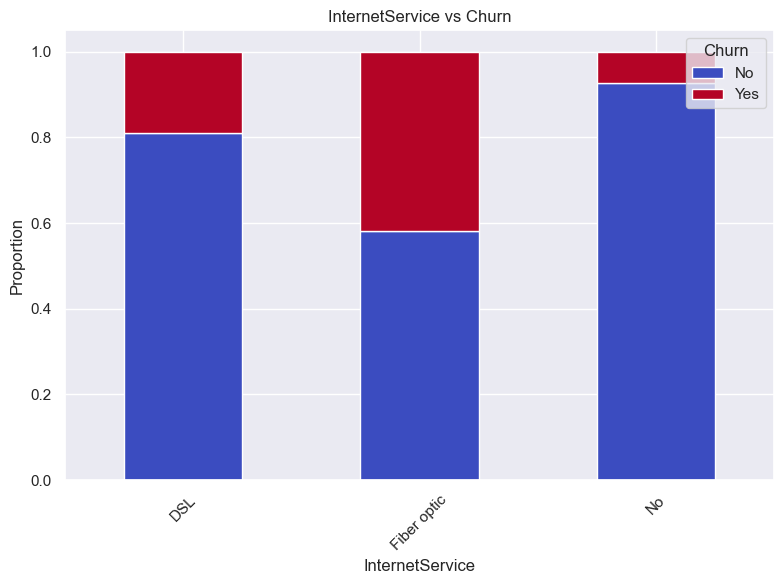

In [97]:
crosstab.plot(kind='bar', stacked=True, figsize=(8,6), colormap='coolwarm')
plt.title('InternetService vs Churn')
plt.xlabel('InternetService')
plt.ylabel('Proportion')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

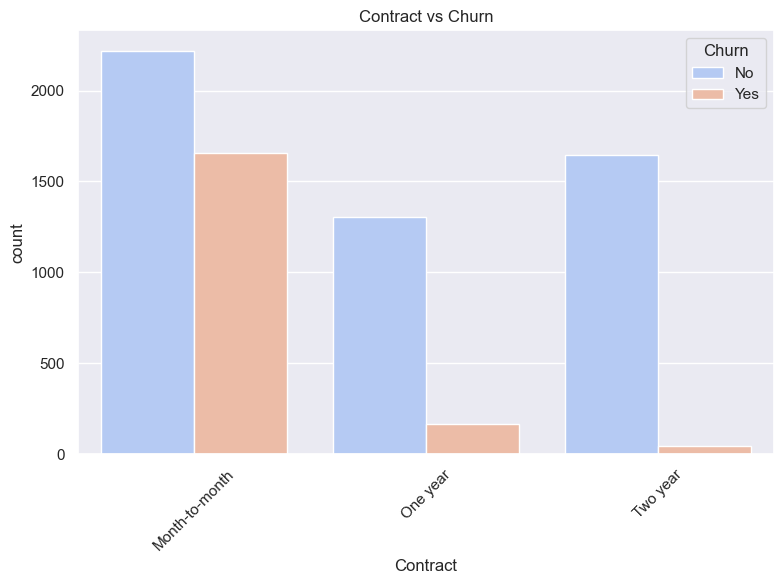

In [100]:
plt.figure(figsize=(8,6))
sns.countplot(data=churn_Data3, x='Contract', hue='Churn', palette='coolwarm')
plt.title('Contract vs Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


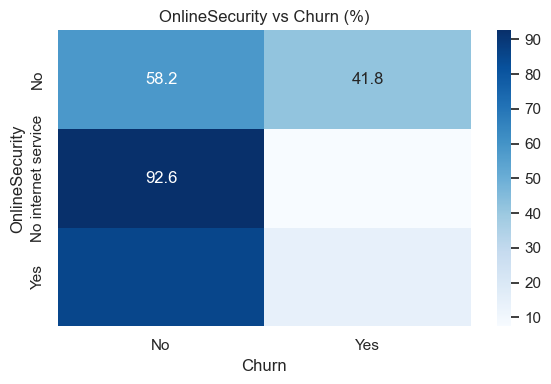

In [102]:
crosstab_perc = pd.crosstab(churn_Data3['OnlineSecurity'], churn_Data3['Churn'], normalize='index')*100

plt.figure(figsize=(6,4))
sns.heatmap(crosstab_perc, annot=True, cmap='Blues', fmt=".1f")
plt.title('OnlineSecurity vs Churn (%)')
plt.ylabel('OnlineSecurity')
plt.xlabel('Churn')
plt.tight_layout()
plt.show()


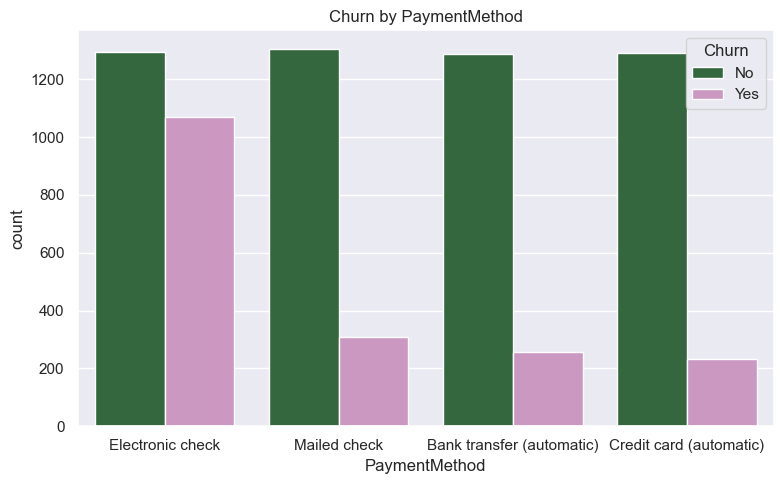

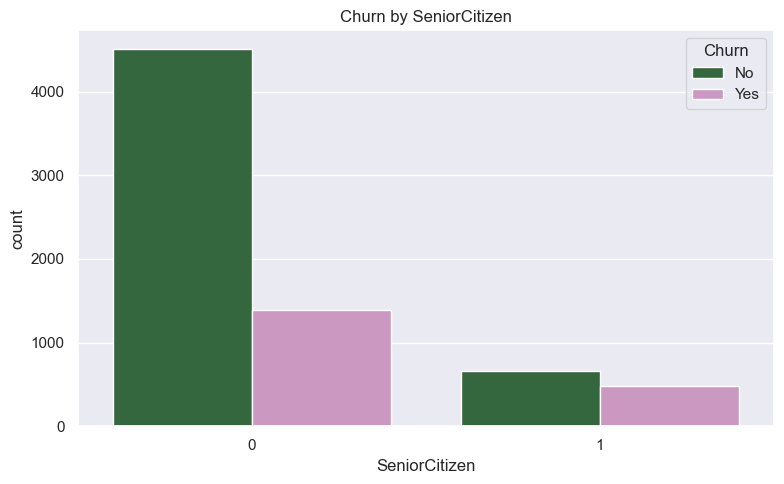

In [70]:
for col in ['PaymentMethod', 'SeniorCitizen']:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=churn_Data3, x=col, hue='Churn', palette='cubehelix')
    plt.title(f'Churn by {col}')
    plt.tight_layout()
    plt.show()

### MultiVariate Analysis

In [71]:
churn_rate = (churn_data
    .groupby(['Contract', 'InternetService'])['Churn']
    .mean()
    .reset_index()
    .sort_values('Churn', ascending=False))
print(churn_rate)
# printing churn_rate by contract & internet service

   Contract  InternetService     Churn
1         0                1  0.546053
0         0                0  0.322159
4         1                1  0.192950
2         0                2  0.188931
3         1                0  0.092982
7         2                1  0.072261
5         1                2  0.024725
6         2                0  0.019108
8         2                2  0.007837


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


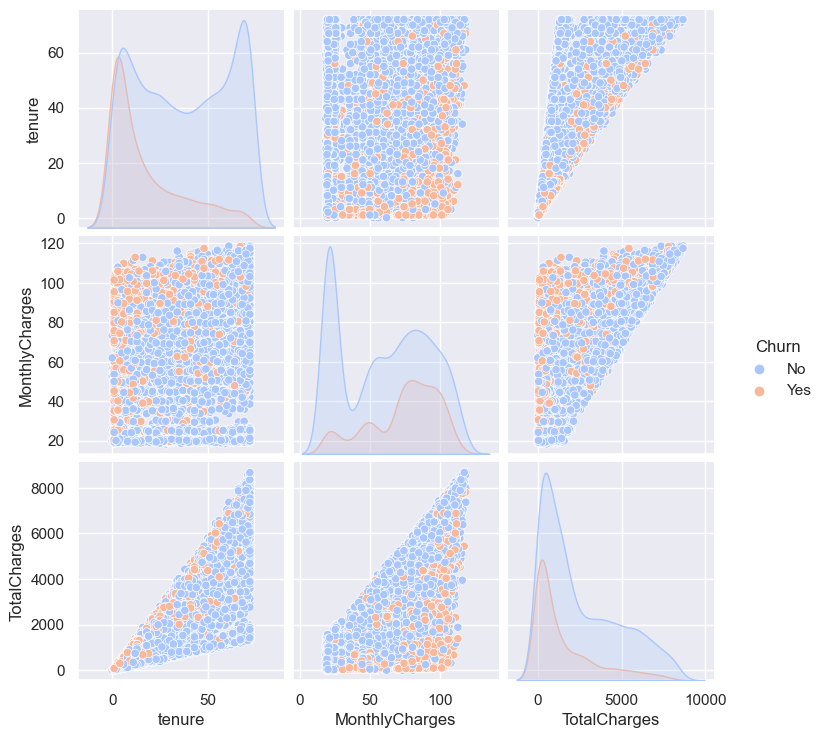

In [104]:
sns.pairplot(churn_Data3, hue='Churn', vars=['tenure','MonthlyCharges','TotalCharges'], palette='coolwarm')
plt.show()

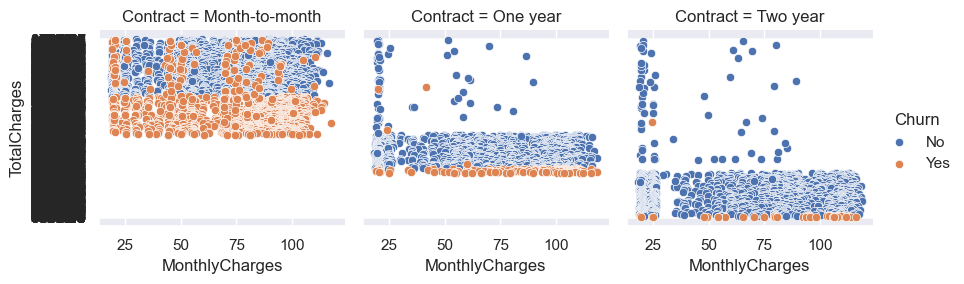

In [76]:
g = sns.FacetGrid(churn_Data3, col='Contract', hue='Churn')
g.map(sns.scatterplot, 'MonthlyCharges', 'TotalCharges')
g.add_legend()
plt.show()

Churn is yes for short terms in most of the cases, long terms are here to stay

In [74]:
avg_values = (churn_data.groupby(['Contract', 'PaymentMethod'])[['MonthlyCharges', 'tenure']].mean().reset_index())
print(avg_values)

    Contract  PaymentMethod  MonthlyCharges     tenure
0          0              0       69.085399  24.904924
1          0              1       67.678821  23.955801
2          0              2       74.989486  17.971351
3          0              3       46.050056  10.042553
4          1              0       67.484143  46.017903
5          1              1       67.972362  45.477387
6          1              2       79.095245  46.178674
7          1              3       44.306380  29.124629
8          2              0       65.013918  61.602837
9          2              1       64.422117  59.807229
10         2              2       84.335714  61.113095
11         2              3       38.587304  42.950262


Longer contracts with payment method electronic check has more monthly charges, with avg tenure over 60.

### SCALING 

In [18]:
X = churn_data.drop('Churn',axis=1)
y = churn_data['Churn']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### BUILDING A NEURAL NETWORK

In [102]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
model = Sequential([Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),BatchNormalization(),Dropout(0.3),Dense(32, activation='relu'),BatchNormalization(),Dropout(0.3),
    Dense(1, activation='sigmoid')]) #using relu for 1st layer activation function & sigmoid for output layer

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC', 'Precision', 'Recall'])
#using adam's optimizer for scaling down the results to relavence

In [63]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

In [64]:
history = model.fit( X_train_scaled, y_train,validation_split=0.2,epochs=160, batch_size=32,class_weight={0: 1, 1: (len(y)/sum(y))},  # optional if imbalanced
    callbacks=[early_stopping, reduce_lr],verbose=1)

model.evaluate(X_test_scaled, y_test) #evaluating the model

Epoch 1/160
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - AUC: 0.6737 - Precision: 0.3726 - Recall: 0.6993 - accuracy: 0.5999 - loss: 1.2734 - val_AUC: 0.8122 - val_Precision: 0.4545 - val_Recall: 0.8007 - val_accuracy: 0.7107 - val_loss: 0.5711 - learning_rate: 0.0010
Epoch 2/160
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7763 - Precision: 0.4253 - Recall: 0.8114 - accuracy: 0.6490 - loss: 1.0040 - val_AUC: 0.8260 - val_Precision: 0.4509 - val_Recall: 0.8007 - val_accuracy: 0.7072 - val_loss: 0.5667 - learning_rate: 0.0010
Epoch 3/160
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7844 - Precision: 0.4453 - Recall: 0.8072 - accuracy: 0.6735 - loss: 0.9759 - val_AUC: 0.8281 - val_Precision: 0.4517 - val_Recall: 0.8327 - val_accuracy: 0.7063 - val_loss: 0.5629 - learning_rate: 0.0010
Epoch 4/160
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8011 - Precision: 0.4677 - Recall: 0.8317 - accuracy: 0.6867 - loss: 0.9389 - val_AUC: 0.8314 - val_Precision: 0.4522 - val_Recall: 0.825

[0.5446860790252686,
 0.7083037495613098,
 0.8540698289871216,
 0.47277936339378357,
 0.8847184777259827]

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicting on the test set
y_pred_probs = model.predict(X_test_scaled)          # these are probabilities
y_pred = (y_pred_probs > 0.5).astype(int).ravel()    # threshold to get class labels

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [66]:
# Printing Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.7083


In [41]:
# Printing first 10 Actual vs Predicted
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nActual vs Predicted (first 10):")
print(comparison_df.head(10))


Actual vs Predicted (first 10):
   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          1
4       0          0
5       1          1
6       0          0
7       0          0
8       1          0
9       1          0


### VISUALISING THE MODEL

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


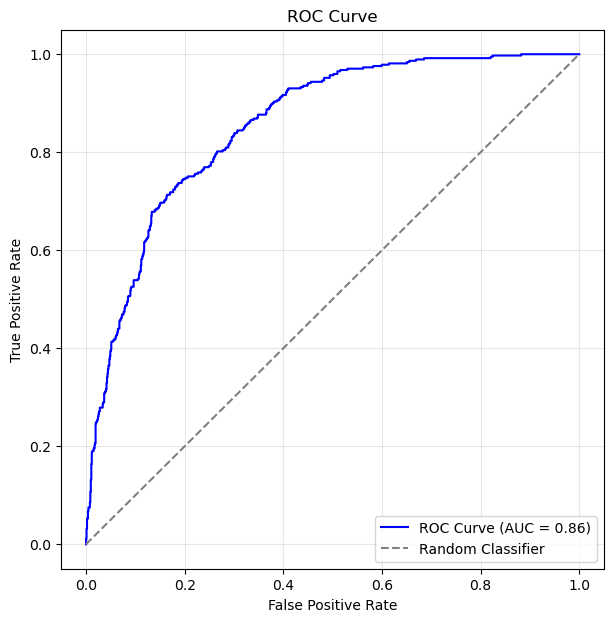

AUC: 0.8560


In [73]:
# Geting predicted probabilities
y_pred_probs = model.predict(X_test_scaled).ravel()

# Computing ROC curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc_score = roc_auc_score(y_test, y_pred_probs)

plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"AUC: {auc_score:.4f}")


# Intuition

It means that the Area under the cure is .86, which indicates that ~86% of the randomly picked churn data will be rightly predicted

### FURTHER IMPROVING THE MODEL

In [67]:
pip install keras-tuner

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ------ -------------------------------- 20.5/129.1 kB 682.7 kB/s eta 0:00:01
   ---------------------------------------- 129.1/129.1 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())  # Balanced!

Before SMOTE: Churn
0    4138
1    1496
Name: count, dtype: int64
After SMOTE: Churn
0    4138
1    4138
Name: count, dtype: int64


In [21]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [22]:
import keras_tuner as kt


def build_model(hp):
    model = Sequential()
    # Tuning number of units in first layer
    hp_units_1 = hp.Int('units_1', min_value=64, max_value=256, step=64)
    model.add(Dense(hp_units_1, activation='relu', input_shape=(X_train_scaled.shape[1],))) #adding the tuned units to 1st layer
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))
    # Tuning number of units in second layer
    hp_units_2 = hp.Int('units_2', min_value=32, max_value=128, step=32)
    model.add(Dense(hp_units_2, activation='relu'))
    model.add(BatchNormalization()) #stabilizing the training process using batch normalization, it acts as a regularizer
    model.add(Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    # Tuning learning rate
    hp_lr = hp.Choice('learning_rate', [1e-2, 1e-3, 5e-4, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_lr),loss='binary_crossentropy',metrics=['accuracy', 'AUC', 'Precision', 'Recall'])
    return model

In [23]:
# Setting up the tuner
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=10,directory='tuner_dir',project_name='churn_tuning')
#tuning the model with randm searcher with 10 trails

Reloading Tuner from tuner_dir\churn_tuning\tuner0.json


In [24]:
# Searching for the best hyperparameters
from tensorflow.keras.optimizers import Adam
tuner.search(X_train_scaled, y_train,validation_split=0.2,epochs=50,batch_size=64,callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)])
#reduceonplateu is used to monitor validation loss

# Getting the best model
best_model = tuner.get_best_models(num_models=1)[0] #tuning to get the best model

# Evaluation & accuracy display
test_loss, test_acc, test_auc, test_prec, test_rec = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Best Test Accuracy: {test_acc:.4f}")

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Test Accuracy: 0.8070


Model is now improved to 80% of the accuracy

### VISUALISING THE MODEL

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
AUC: 0.8490


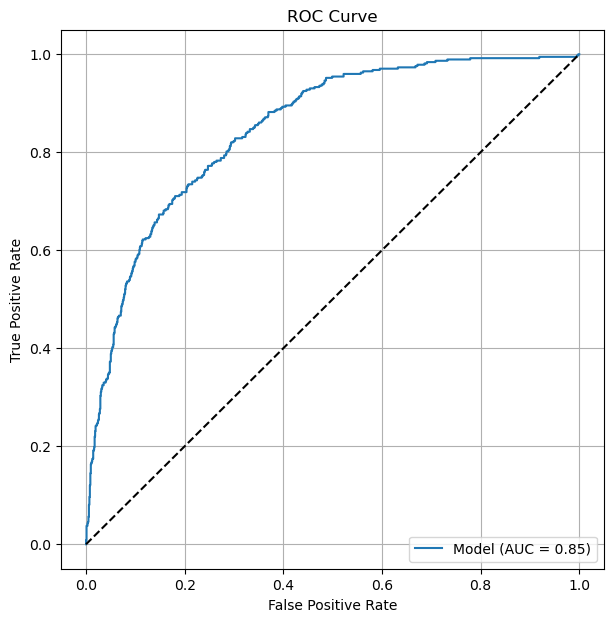

In [25]:
y_pred_proba = best_model.predict(X_test_scaled).ravel()  # shape (n_samples,)

# Computing area under curver
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc_score:.4f}")

# Computing ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, label=f'Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

TUNED neural network correctly predicts 85% of the time with increased accuracy of 80%

In [30]:
import joblib
joblib.dump(best_model, 'model_churn.pkl')
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']